# 6.4 Task Supervised Machine Learning: Regression

## Script Contents:
### 1. Importing libraries and data
### 2. Data Cleaning
### 3. Data prep for Regression Analysis
### 4. Regression Analysis

# 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# assign path

path = r'C:\Users\X1\House Sales Analysis Master'

In [4]:
# Import House Sales dataset

df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','house_data_cleaned1.csv'), index_col = False)

In [5]:
# Show all columns

pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Price category
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,High price
1,1,6414100192,12/09/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,High price
2,2,5631500400,02/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,High price
3,3,2487200875,12/09/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,High price
4,4,1954400510,02/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,High price


In [6]:
df.shape

(21603, 23)

# 2. Data Cleaning

### Missing Values

In [8]:
# Check for missing values

df.isnull().sum()

# No missing values

Unnamed: 0        0
id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
Price category    0
dtype: int64

### Duplicates Check

In [10]:
dups = df.duplicated()

dups.shape # No dups

(21603,)

### Extreme Values Check

C:\Users\X1\AppData\Local\Temp\ipykernel_18728\1384554536.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], bins=25) # Shows extreme values
C:\Users\X1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

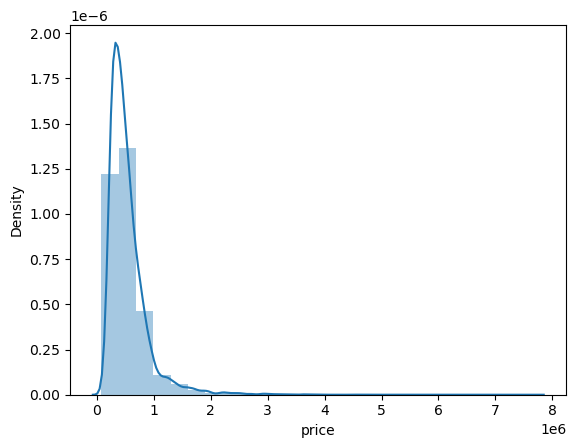

In [14]:
sns.distplot(df['price'], bins=25) # Shows extreme values

In [15]:
# Check the mean

df['price'].mean() 

540224.3229181132

In [16]:
# Check the median

df['price'].median() 

450000.0

In [17]:
# Check the max

df['price'].max() 

7700000.0

# 3. Data prep for regression analysis

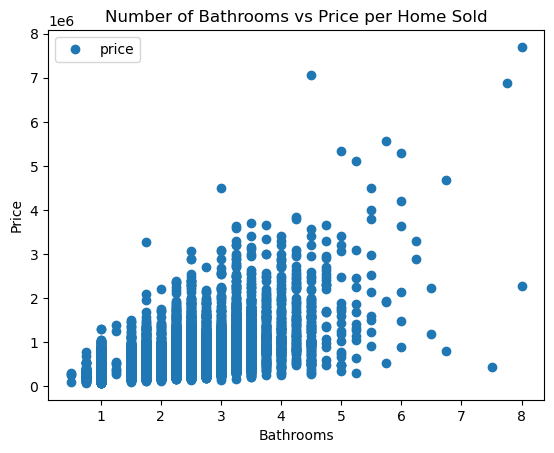

In [18]:
# Create a scatterplot with price and number of bathrooms

df.plot(x = 'bathrooms', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of Bathrooms vs Price per Home Sold')  
plt.xlabel('Bathrooms')  
plt.ylabel('Price')  
plt.show()

## This Bathroom vs Price plot is showing a positive relationship between number of bathrooms and how much the home was sold for.  
## Hypothesis: The more bathrooms a unit has, the higher the price of the house.

### Reshaping variables into NumPy arrays and put them into separate objects.

In [19]:
X = df['bathrooms'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [20]:
X

array([[1.  ],
       [2.25],
       [1.  ],
       ...,
       [0.75],
       [2.5 ],
       [0.75]])

In [21]:
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [22]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4. Regression Analysis

In [23]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [24]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

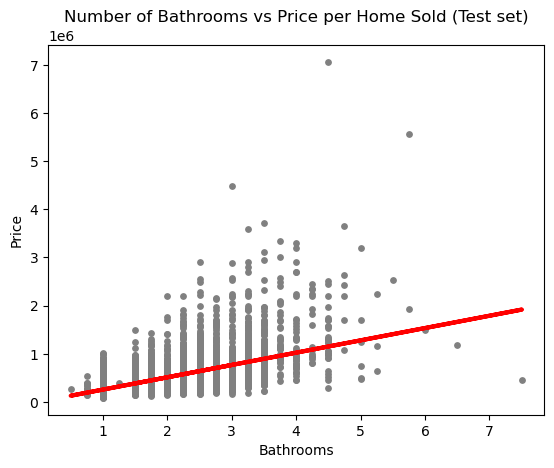

In [26]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of Bathrooms vs Price per Home Sold (Test set)')
plot_test.xlabel('Bathrooms')
plot_test.ylabel('Price')
plot_test.show()

## The regression line fits somewhat accurately. However, towards the top of the plot, there are some homes with 3, 4, or even 6 bathrooms with a higher selling price than other homes with 7+ bathrooms.  This contradicts my hypothesis.

### Check MSE and R2 score

In [27]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [28]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[255526.096302]]
Mean squared error:  97613517472.28062
R2 score:  0.25591642344822474


### Compare predicted y values with actual y values

In [29]:
y_predicted

array([[383039.52809191],
       [510802.57624291],
       [702447.14846941],
       ...,
       [638565.62439391],
       [638565.62439391],
       [766328.67254491]])

In [30]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,390000.0,3.830395e+05
1,265000.0,5.108026e+05
2,839000.0,7.024471e+05
3,405000.0,6.385656e+05
4,422250.0,3.830395e+05
5,349900.0,6.385656e+05
6,295000.0,6.385656e+05
7,348000.0,2.552765e+05
8,217500.0,2.552765e+05
9,340000.0,4.469211e+05


## The R2 score is surprisingly low at 0.26 percent.  Although there is a trend of having more bathrooms in a home leads to higher prices, it is clear that this is not the only deciding factor in driving prices.
## Regarding possible data bias, Measurement Bias may affect the regression model due to the number of values I had to adjust prior to importing the data set (one home having 33 bathrooms and 10 homes having zero bathrooms).